<a href="https://colab.research.google.com/github/fangyiyu/Time_Series_Analysis/blob/master/Weather_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
pip install pystan==2.19.1.1 prophet

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from prophet import Prophet
from datetime import datetime
from prophet.plot import plot_plotly, plot_components_plotly

In [1]:
! pip install kaggle

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [5]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/My Drive/TimeSeries"

In [48]:
!kaggle datasets download -d sumanthvrao/daily-climate-time-series-data

  0% 0.00/22.0k [00:00<?, ?B/s]
100% 22.0k/22.0k [00:00<00:00, 34.9MB/s]


In [49]:
!unzip \*.zip && rm *.zip

Archive:  daily-climate-time-series-data.zip
  inflating: DailyDelhiClimateTest.csv  
  inflating: DailyDelhiClimateTrain.csv  


In [1]:
ls

 components.png              'kaggle .json'
 DailyDelhiClimateTest.csv    kaggle.json
 DailyDelhiClimateTrain.csv   sample_data/
 gdrive/                     'Time-Series Analysis Dataset.csv'
'kaggle (1).json'


In [3]:
df = pd.read_csv('/content/DailyDelhiClimateTrain.csv')
df_test = pd.read_csv('/content/DailyDelhiClimateTest.csv')

In [4]:
df=df[['date','meantemp']]
df=df.rename(columns={'date':'ds','meantemp':'y'})

In [5]:
df_copy = df.copy()

In [6]:
#df_copy.isnull().sum()
#df_copy.dtypes

In [7]:
pd.to_datetime(df_copy.ds)

0      2013-01-01
1      2013-01-02
2      2013-01-03
3      2013-01-04
4      2013-01-05
          ...    
1457   2016-12-28
1458   2016-12-29
1459   2016-12-30
1460   2016-12-31
1461   2017-01-01
Name: ds, Length: 1462, dtype: datetime64[ns]

In [8]:
#df_copy.shape

In [9]:
df_copy = df_copy[:-1]

In [10]:
#df_copy.shape

In [11]:
#df_copy.tail()

In [12]:
#df_test.tail()

In [13]:
df_test = df_test[['date','meantemp']]
df_test.tail()

,date,meantemp
109,2017-04-20,34.500
110,2017-04-21,34.250
111,2017-04-22,32.900
112,2017-04-23,32.875
113,2017-04-24,32.000


In [33]:
m = Prophet(interval_width=0.95, yearly_seasonality=True, weekly_seasonality=True, daily_seasonality=True)
m.add_seasonality(name='monthly', period=30.5, fourier_order=5, prior_scale=0.02)
m.fit(df_copy)
future = m.make_future_dataframe(periods=114)
future.tail()

,ds
1570,2017-04-20
1571,2017-04-21
1572,2017-04-22
1573,2017-04-23
1574,2017-04-24


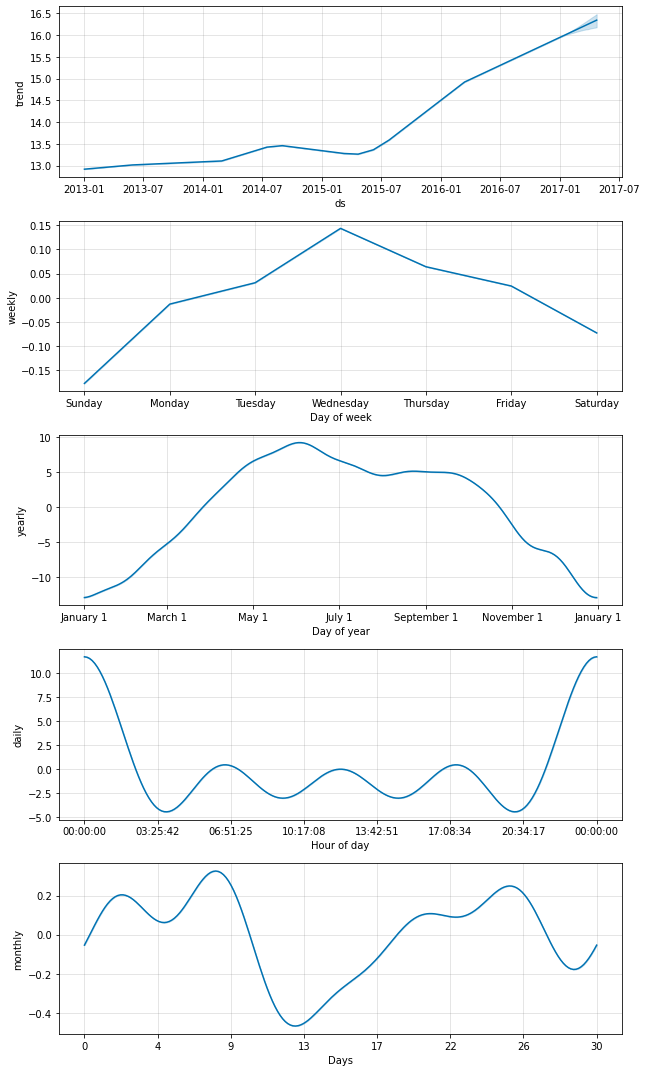

In [34]:
forecast = m.predict(future)
fig = m.plot_components(forecast)

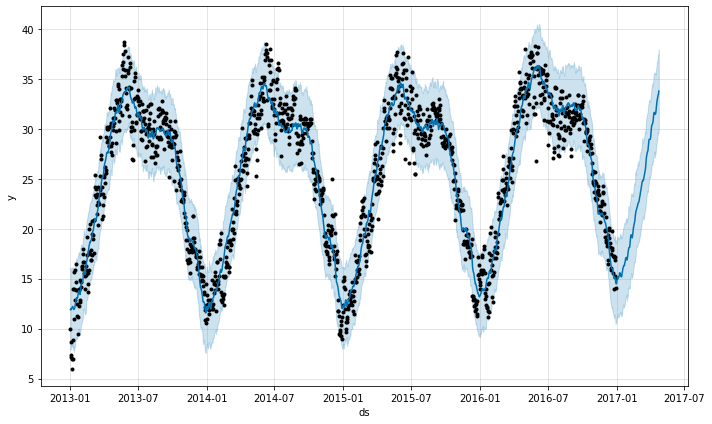

In [35]:
figure = m.plot(forecast)

In [36]:
#plot_plotly(m, forecast)

In [37]:
forecast= forecast[['ds','yhat']]

In [38]:
from sklearn.metrics import r2_score
y_true = df_test.meantemp
y_pred = forecast.yhat.tail(114)
r2_score(y_true, y_pred)

0.8154869523061125